In [1]:
import os

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13780878210071979643
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4951913267
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10281240396222099732
physical_device_desc: "device: 0, name: GeForce GTX 1060 6GB, pci bus id: 0000:02:00.0, compute capability: 6.1"
]


In [3]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [4]:
import train, plotting, config, models

#### 0. Description for Data Output

In [5]:
model_description = 'Model_A1_SDNET2018_20190321A'

#### 1. Build Model

In [6]:
# Custom Model vA1
model = models.model_A1(verbose=True)

#### 2. Create Image Data Generators

In [7]:
train_gen, validation_gen, test_gen = train.build_generators()

Found 3400 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


#### 3. Fit Model

In [8]:
history = train.train_model(model=model,
                      train_generator=train_gen,
                      validation_generator=validation_gen,
                      model_description=model_description)

Epoch 1/100
106/106 [==============================] - 21s 197ms/step - loss: 0.7296 - acc: 0.5395 - val_loss: 0.8071 - val_acc: 0.5574

Epoch 00001: acc improved from -inf to 0.53950, saving model to C:\Users\colin\Google_Drive\ilocal\data\model_outputs\Model_A1_SDNET2018_20190321A\Model_A1_SDNET2018_20190321A_weights_improvement_01-0.56.hdf5
Epoch 2/100
106/106 [==============================] - 15s 142ms/step - loss: 0.6064 - acc: 0.6860 - val_loss: 0.6459 - val_acc: 0.6301

Epoch 00002: acc improved from 0.53950 to 0.68735, saving model to C:\Users\colin\Google_Drive\ilocal\data\model_outputs\Model_A1_SDNET2018_20190321A\Model_A1_SDNET2018_20190321A_weights_improvement_02-0.63.hdf5
Epoch 3/100
106/106 [==============================] - 16s 150ms/step - loss: 0.5588 - acc: 0.7099 - val_loss: 0.9065 - val_acc: 0.6498

Epoch 00003: acc improved from 0.68735 to 0.70873, saving model to C:\Users\colin\Google_Drive\ilocal\data\model_outputs\Model_A1_SDNET2018_20190321A\Model_A1_SDNET2018

106/106 [==============================] - 15s 142ms/step - loss: 0.3773 - acc: 0.8576 - val_loss: 1.1387 - val_acc: 0.5916

Epoch 00033: acc did not improve from 0.87292
Epoch 34/100
106/106 [==============================] - 15s 142ms/step - loss: 0.3991 - acc: 0.8608 - val_loss: 1.2236 - val_acc: 0.5865

Epoch 00034: acc did not improve from 0.87292
Epoch 35/100
106/106 [==============================] - 15s 140ms/step - loss: 0.4088 - acc: 0.8597 - val_loss: 1.3384 - val_acc: 0.4914

Epoch 00035: acc did not improve from 0.87292
Epoch 36/100
106/106 [==============================] - 15s 141ms/step - loss: 0.3922 - acc: 0.8532 - val_loss: 0.9471 - val_acc: 0.5462

Epoch 00036: acc did not improve from 0.87292
Epoch 37/100
106/106 [==============================] - 15s 141ms/step - loss: 0.3626 - acc: 0.8759 - val_loss: 1.3949 - val_acc: 0.5685

Epoch 00037: acc improved from 0.87292 to 0.87589, saving model to C:\Users\colin\Google_Drive\ilocal\data\model_outputs\Model_A1_SDNET2018

106/106 [==============================] - 15s 146ms/step - loss: 0.3681 - acc: 0.8685 - val_loss: 0.9295 - val_acc: 0.5950

Epoch 00075: acc did not improve from 0.88569
Epoch 76/100
106/106 [==============================] - 15s 139ms/step - loss: 0.3598 - acc: 0.8774 - val_loss: 1.0141 - val_acc: 0.5616

Epoch 00076: acc did not improve from 0.88569
Epoch 77/100
106/106 [==============================] - 15s 142ms/step - loss: 0.3853 - acc: 0.8729 - val_loss: 0.8631 - val_acc: 0.6073

Epoch 00077: acc did not improve from 0.88569
Epoch 78/100
106/106 [==============================] - 15s 140ms/step - loss: 0.3573 - acc: 0.8712 - val_loss: 1.5970 - val_acc: 0.5693 acc: - ETA: 5s - loss:  - ETA: 2s - los

Epoch 00078: acc did not improve from 0.88569
Epoch 79/100
106/106 [==============================] - 15s 142ms/step - loss: 0.3586 - acc: 0.8797 - val_loss: 1.1228 - val_acc: 0.5565

Epoch 00079: acc did not improve from 0.88569
Epoch 80/100
106/106 [==============================]

In [9]:
training_output_dir = (config.model_dir + os.path.sep + 
                       model_description + os.path.sep)
training_output_dir

'C:\\Users\\colin\\Google_Drive\\ilocal\\data\\model_outputs\\Model_A1_SDNET2018_20190321A\\'

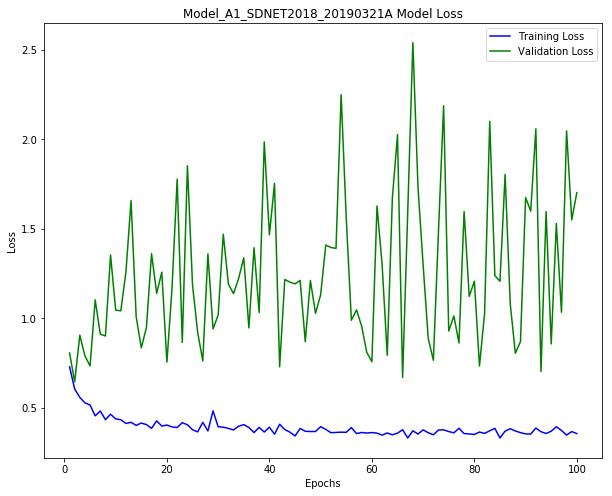

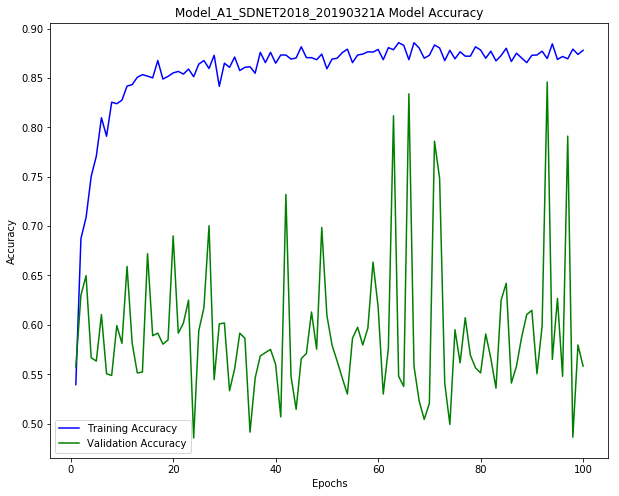

In [10]:
plotting.plot_history(history, description=model_description, folder_path=training_output_dir)